<a href="https://colab.research.google.com/github/rahatarinasir/Dayche/blob/master/Auto_encoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A simple Classification on Mnist Dataset based on a Compact Representation of data 

## Initialization

In [ ]:
import keras 
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from customized_layers import RoughLayer
from sklearn.metrics import confusion_matrix, classification_report

## Mnist data loading 

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
plt.imshow(x_train[10].reshape(28, 28))

## Build a simple autoencoder

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = keras.layers.Dense(144, activation='relu')(input_img)
decoded = keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)
encoder = keras.Model(input_img, encoded)
decoder_layer = autoencoder.layers[-1]
encoded_input = keras.Input(shape=(144,))
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

## Autoencoder training

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = 'binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2072 - binary_crossentropy: 0.2072 - val_loss: 0.1289 - val_binary_crossentropy: 0.1289
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1126 - binary_crossentropy: 0.1126 - val_loss: 0.0984 - val_binary_crossentropy: 0.0984
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0927 - binary_crossentropy: 0.0927 - val_loss: 0.0861 - val_binary_crossentropy: 0.0861
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0834 - binary_crossentropy: 0.0834 - val_loss: 0.0796 - val_binary_crossentropy: 0.0796
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0780 - binary_crossentropy: 0.0780 - val_loss: 0.0755 - val_binary_crossentropy: 0.0755
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0748 - binary_crossentropy: 0.0748 - val_loss: 0.0730 - val_binary_crossentropy: 0.0730
Epoch 7/50
235/2

## Visualization

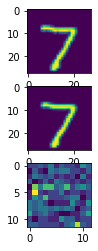

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
plt.subplot(311)
plt.imshow(x_test[0].reshape(28, 28))
plt.subplot(312)
plt.imshow(decoded_imgs[0].reshape(28, 28))
plt.subplot(313)
plt.imshow(np.uint(encoded_imgs[0].reshape(12, 12)))

## Classification

In [ ]:
x_train_encoded, x_test_encoded = encoder(x_train), encoder(x_test)
print(x_train_encoded.shape)
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))
# y = model(x_train_encoded)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
model.fit(x_train_encoded, tf.keras.utils.to_categorical(y_train), 
          validation_data = (x_test_encoded, tf.keras.utils.to_categorical(y_test)), 
          epochs = 100, 
          batch_size = 32)

(60000, 144)
Epoch 1/100
1875/1875 [==============================] - 2s 958us/step - loss: 0.1234 - accuracy: 0.8009 - val_loss: 0.0679 - val_accuracy: 0.9039
Epoch 2/100
1875/1875 [==============================] - 2s 946us/step - loss: 0.0636 - accuracy: 0.9084 - val_loss: 0.0593 - val_accuracy: 0.9127
Epoch 3/100
1875/1875 [==============================] - 2s 969us/step - loss: 0.0531 - accuracy: 0.9237 - val_loss: 0.0538 - val_accuracy: 0.9263
Epoch 4/100
1875/1875 [==============================] - 2s 971us/step - loss: 0.0465 - accuracy: 0.9340 - val_loss: 0.0425 - val_accuracy: 0.9398
Epoch 5/100
1875/1875 [==============================] - 2s 945us/step - loss: 0.0420 - accuracy: 0.9402 - val_loss: 0.0404 - val_accuracy: 0.9455
Epoch 6/100
1875/1875 [==============================] - 2s 934us/step - loss: 0.0386 - accuracy: 0.9459 - val_loss: 0.0367 - val_accuracy: 0.9505
Epoch 7/100
1875/1875 [==============================] - 2s 966us/step - loss: 0.0359 - accuracy: 0.9493 

## Evaluation of the model

In [ ]:
y_pre_te = model.predict(x_test_encoded)
print(confusion_matrix(np.argmax(y_pre_te, axis = 1), y_test))
print(classification_report(np.argmax(y_pre_te, axis = 1), y_test))

[[ 970    0    3    1    3    4    9    1    7    6]
 [   0 1124    2    0    0    0    3    4    1    5]
 [   1    3 1005    6    5    1    4   14    7    1]
 [   1    3    7  987    0   27    0    4    6   12]
 [   1    0    1    0  963    0    9    2    4   24]
 [   1    1    0    6    0  842   10    0    3    2]
 [   1    2    1    0    1    5  915    0    1    0]
 [   1    0    9    6    2    3    1  999    8   15]
 [   3    2    3    4    2    8    6    1  936    2]
 [   1    0    1    0    6    2    1    3    1  942]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1004
           1       0.99      0.99      0.99      1139
           2       0.97      0.96      0.97      1047
           3       0.98      0.94      0.96      1047
           4       0.98      0.96      0.97      1004
           5       0.94      0.97      0.96       865
           6       0.96      0.99      0.97       926
           7       0.97      0.96   

# A simple Classification on Breast Cancer Dataset based on a Compact Representation of data 

## Data loading

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
scaler = MinMaxScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

In [ ]:

input_m = keras.Input(shape=(30,))
encoded = keras.layers.Dense(2, activation='sigmoid')(input_m)
decoded = keras.layers.Dense(30, activation='linear')(encoded)
autoencoder = keras.Model(input_m, decoded)
encoder = keras.Model(input_m, encoded)
decoder_layer = autoencoder.layers[-1]
encoded_input = keras.Input(shape=(2,))
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse', metrics = 'mse')
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=5,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0942 - mse: 0.0942 - val_loss: 0.0781 - val_mse: 0.0781
Epoch 2/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0544 - mse: 0.0544 - val_loss: 0.0528 - val_mse: 0.0528
Epoch 3/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0408 - val_mse: 0.0408
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 5/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0257 - mse: 0.0257 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0278 - val_mse: 0.0278
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 8/100
80/80 [==============================] - 0s 1ms/step - loss: 0.0205 - m

In [ ]:
encoded_x_test = encoder(X_test)
encoded_x_train = encoder(X_train)

In [ ]:
classifier = keras.models.Sequential()
classifier.add(keras.layers.Dense(5, activation = 'relu'))
classifier.add(keras.layers.Dense(1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
classifier.fit(encoded_x_train, y_train, validation_data = (encoded_x_test, y_test), epochs = 100, batch_size = 5 )

Epoch 1/100
80/80 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6482 - val_loss: 0.6481 - val_accuracy: 0.6257
Epoch 2/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6295 - accuracy: 0.6457 - val_loss: 0.6194 - val_accuracy: 0.6784
Epoch 3/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6040 - accuracy: 0.6784 - val_loss: 0.5967 - val_accuracy: 0.7310
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5818 - accuracy: 0.7312 - val_loss: 0.5766 - val_accuracy: 0.7427
Epoch 5/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5612 - accuracy: 0.7286 - val_loss: 0.5565 - val_accuracy: 0.7602
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5412 - accuracy: 0.7588 - val_loss: 0.5366 - val_accuracy: 0.7719
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.5222 - accuracy: 0.7839 - val_loss: 0.5167 - val_accuracy: 0.7895
Epoch 8/100
8

Epoch 59/100
80/80 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.9447 - val_loss: 0.1693 - val_accuracy: 0.9415
Epoch 60/100
80/80 [==============================] - 0s 1ms/step - loss: 0.1586 - accuracy: 0.9472 - val_loss: 0.1682 - val_accuracy: 0.9415
Epoch 61/100
80/80 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.9447 - val_loss: 0.1672 - val_accuracy: 0.9415
Epoch 62/100
80/80 [==============================] - 0s 1ms/step - loss: 0.1561 - accuracy: 0.9472 - val_loss: 0.1664 - val_accuracy: 0.9415
Epoch 63/100
80/80 [==============================] - 0s 1ms/step - loss: 0.1553 - accuracy: 0.9447 - val_loss: 0.1654 - val_accuracy: 0.9415
Epoch 64/100
80/80 [==============================] - 0s 1ms/step - loss: 0.1545 - accuracy: 0.9447 - val_loss: 0.1646 - val_accuracy: 0.9415
Epoch 65/100
80/80 [==============================] - 0s 1ms/step - loss: 0.1542 - accuracy: 0.9497 - val_loss: 0.1637 - val_accuracy: 0.9415
Epoch 

In [ ]:
y_pre = classifier.predict(encoded_x_test)
y_pre[y_pre >= 0.5] = 1
y_pre[y_pre < 0.5] = 0
print(confusion_matrix(y_pre, y_test))
print(classification_report(y_pre, y_test))

[[ 59   2]
 [  8 102]]
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92        61
         1.0       0.98      0.93      0.95       110

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171

